In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.xmargin']=0
plt.rcParams['legend.fontsize'] = 14

In [2]:
with open('results/rosenbrock_20d_3l_v2.pkl', 'rb') as f:
    results = pickle.load(f)
with open('results/rosenbrock_20d_3l_naive.pkl', 'rb') as f:
    results_naive = pickle.load(f)

In [3]:
# Extract the relevant results from the dictionary
true_points = np.array(results['true_points'])
true_optima = np.array(results['true_optima'])
glis_x_points = results['glis_x_points']
glis_x_values = results['glis_x_values']
glis_z_decoded_points = results['glis_z_decoded_points']
glis_z_values = results['glis_z_values']
glis_z_decoded_points_naive = results_naive['glis_z_decoded_points']
glis_z_values_naive = results_naive['glis_z_values']

# Number of evaluations (assuming all optimization routines have the same number of evaluations)
n_tests = len(glis_x_points)
max_evals = len(glis_x_points[0])

# Initialize the lists to store the best sequences for x, z, and z_naive
best_glis_z_values = []
best_glis_z_points = []
best_glis_z_values_naive = []
best_glis_z_points_naive = []
best_glis_x_values = []
best_glis_x_points = []

for j in range(n_tests):
    # Initialize best tracking variables for each experiment
    min_glis_z_value = np.inf
    min_glis_z_value_naive = np.inf
    min_glis_x_value = np.inf

    # Temporary storage for the best sequences for this experiment
    temp_best_sequence_values_z = []
    temp_best_sequence_points_z = []
    temp_best_sequence_values_z_naive = []
    temp_best_sequence_points_naive = []
    temp_best_sequence_values_x = []
    temp_best_sequence_points_x = []
    
    best_point_x = None
    best_point_z = None
    best_point_z_naive = None

    for i in range(max_evals):
        # Current values at this evaluation for experiment j
        current_glis_z_value = np.array(glis_z_values)[j, i]
        current_glis_z_value_naive = np.array(glis_z_values_naive)[j, i]
        current_glis_x_value = np.array(glis_x_values)[j, i]

        # --- Track the best GLIS over z (decoded points) ---
        if current_glis_z_value < min_glis_z_value:
            min_glis_z_value = current_glis_z_value
            best_point_z = glis_z_decoded_points[j][i]  # Store best point

        temp_best_sequence_values_z.append(min_glis_z_value)
        temp_best_sequence_points_z.append(best_point_z)  # Append best so far

        # --- Track the best naive GLIS over z (decoded points) ---
        if current_glis_z_value_naive < min_glis_z_value_naive:
            min_glis_z_value_naive = current_glis_z_value_naive
            best_point_z_naive = glis_z_decoded_points_naive[j][i]  # Store best point
        temp_best_sequence_values_z_naive.append(min_glis_z_value_naive)
        temp_best_sequence_points_naive.append(best_point_z_naive)  # Append best so far
        
        # --- Track the best GLIS over x ---
        if current_glis_x_value < min_glis_x_value:
            min_glis_x_value = current_glis_x_value
            best_point_x = glis_x_points[j][i]  # Store best point
        temp_best_sequence_values_x.append(min_glis_x_value)
        temp_best_sequence_points_x.append(best_point_x)  # Append best so far

    # Append the best sequences for this experiment
    best_glis_z_values.append(temp_best_sequence_values_z)
    best_glis_z_points.append(temp_best_sequence_points_z)
    best_glis_z_values_naive.append(temp_best_sequence_values_z_naive)
    best_glis_z_points_naive.append(temp_best_sequence_points_naive)
    best_glis_x_values.append(temp_best_sequence_values_x)
    best_glis_x_points.append(temp_best_sequence_points_x)

# Convert lists to arrays for consistency and easy indexing
best_glis_z_points = np.array(best_glis_z_points)           # Shape: (n_tests, max_evals, dim)
best_glis_z_values = np.array(best_glis_z_values)           # Shape: (n_tests, max_evals)
best_glis_z_points_naive = np.array(best_glis_z_points_naive)  # Shape: (n_tests, max_evals, dim)
best_glis_z_values_naive = np.array(best_glis_z_values_naive)  # Shape: (n_tests, max_evals)
best_glis_x_points = np.array(best_glis_x_points)           # Shape: (n_tests, max_evals, dim)
best_glis_x_values = np.array(best_glis_x_values)           # Shape: (n_tests, max_evals)

In [4]:
# # Convert the best sequences into numpy arrays for easy handling
glis_x_points = np.array(glis_x_points)                   # Shape: (n_tests, max_evals, dim)
glis_z_decoded_points = np.array(glis_z_decoded_points)           # Shape: (n_tests, max_evals, dim)
glis_z_decoded_points_naive = np.array(glis_z_decoded_points_naive)  # Naive version

# best_glis_z_values = np.array(best_glis_z_values)              # Shape: (n_tests, max_evals)
# best_glis_z_values_naive = np.array(best_glis_z_values_naive)  # Naive version
# best_glis_x_values = np.array(best_glis_x_values)              # Shape: (n_tests, max_evals)
# best_glis_x_points = np.array(best_glis_x_points)              # Shape: (n_tests, max_evals, dim)

In [5]:
glis_x_points.shape

(100, 100, 20)

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


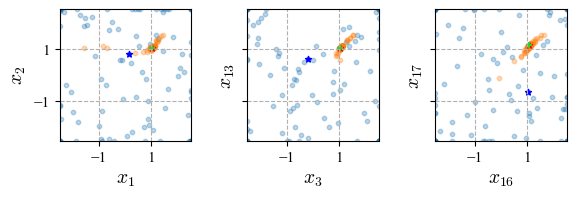

In [7]:
# Define pairs of dimensions to compare
# idx_fixed = [(0, 1), (2, 12), (4, 12), (15, 16)]  # Modify these indices according to your setup
idx_fixed = [(0, 1), (2, 12), (15, 16)]

instances = 1

# Number of subplots
fig, axes = plt.subplots(1, 3, figsize=(6, 2), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten for easy iteration

# Iterate through the subplots
for i, ax in enumerate(axes):
    first_idx, second_idx = idx_fixed[i]
    
    # Scatter plot for GLIS X points
    ax.scatter(np.array(glis_x_points)[:instances, :, first_idx], np.array(glis_x_points)[:instances, :, second_idx], 
               label='_nolegend_', s=10, alpha=0.3, color='tab:blue', rasterized=True)
    
    # Scatter plot for GLIS Z decoded points
    ax.scatter(np.array(glis_z_decoded_points)[:instances, :, first_idx], np.array(glis_z_decoded_points)[:instances, :, second_idx], 
               label='_nolegend_', s=10, alpha=0.3, color='tab:orange', rasterized=True)
    
    # Scatter plot for naive GLIS Z decoded points
    # ax.scatter(glis_z_decoded_points_naive[:instances, :, first_idx], glis_z_decoded_points_naive[:instances, :, second_idx],
    #            label='_nolegend_', s=10, alpha=0.3, color='tab:pink', rasterized=True)
    
    # Scatter plot for best GLIS X points (last evaluation)
    ax.scatter(np.array(best_glis_x_points)[:instances, -1, first_idx], np.array(best_glis_x_points)[:instances, -1, second_idx], 
               label='_nolegend_', marker='*', s=20, alpha=1, color='blue', rasterized=True)
    
    # Scatter plot for best GLIS Z points (last evaluation)
    ax.scatter(np.array(best_glis_z_points)[:instances, -1, first_idx], np.array(best_glis_z_points)[:instances, -1, second_idx], 
               label='_nolegend_', marker='*', s=20, alpha=1, color='red', rasterized=True)
    
    # Scatter plot for naive GLIS Z decoded points (last evaluation)
    # ax.scatter(np.array(best_glis_z_points_naive)[:instances, -1, first_idx], np.array(best_glis_z_points_naive)[:instances, -1, second_idx],
    #            label='_nolegend_', marker='*', s=20, alpha=1, color='magenta', rasterized=True)
    
    # Scatter plot for true points
    ax.scatter(np.array(true_points)[:instances, first_idx], np.array(true_points)[:instances, second_idx], marker='+', label='_nolegend_', 
               s=20, alpha=1, color='limegreen', rasterized=True)

    # Set labels and limits
    ax.set_xlabel(f'$x_{{{first_idx + 1}}}$')
    ax.set_ylabel(f'$x_{{{second_idx + 1}}}$')
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-2.5, 2.5])
    ax.set_xticks([-1, 1])
    ax.set_yticks([-1, 1])
    ax.set_aspect('equal')

# Create a single legend for the entire figure
handles = [
    plt.Line2D([], [], marker='o', linestyle='None', markersize=5, color='tab:blue', label='$x$'),
    plt.Line2D([], [], marker='*', linestyle='None', markersize=5, color='blue', label='$x^*$'),
    
    plt.Line2D([], [], marker='o', linestyle='None', markersize=5, color='tab:orange', label='$\\mathrm{D}(z)$'),
    
    plt.Line2D([], [], marker='*', linestyle='None', markersize=5, color='red', label='$\\mathrm{D}(z^*)$'),
    
    plt.Line2D([], [], marker='o', linestyle='None', markersize=5, color='tab:pink', label=r'$\mathrm{D}^{\text{naive}}(z)$'),
    plt.Line2D([], [], marker='*', linestyle='None', markersize=5, color='magenta', label=r'$\mathrm{D}^{\text{naive}}(z^*)$'),
    plt.Line2D([], [], marker='*', linestyle='None', markersize=5, color='limegreen', label='$x^\\star$'),
]

# fig.legend(handles=handles, loc='upper center', ncol=4, bbox_to_anchor=(0.53, 1.01))
# plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust layout to accommodate the legend


plt.tight_layout()

plt.savefig('rosenbrock_glis_1x3.pdf', dpi=300)


plt.show()

In [8]:
np.linalg.norm(true_points - best_glis_z_points[:,-1,:], axis=1)

array([0.04518217, 0.18538041, 0.06886741, 0.22341602, 2.0608344 ,
       2.0409224 , 0.06149863, 2.0557344 , 0.03907003, 0.05289486,
       0.05755913, 0.06904832, 0.42524958, 0.05834983, 0.06180245,
       2.03979   , 0.06539362, 0.15866037, 0.04620981, 0.17210366,
       0.04607217, 0.15642482, 0.05136209, 2.031516  , 0.05181834,
       0.04754385, 0.03881852, 0.07967374, 0.04554719, 0.05912022,
       0.04616158, 0.07165261, 0.0470722 , 0.05648461, 0.2398274 ,
       0.04637127, 0.04389973, 0.0513305 , 0.04731295, 0.08470836,
       0.04964988, 2.049591  , 1.3181579 , 0.03984607, 0.15065946,
       0.05888239, 0.07117687, 0.07704048, 0.04548861, 0.04864176,
       0.06433433, 2.015281  , 2.0553308 , 0.06494511, 0.04836306,
       2.0166411 , 0.06851922, 0.04170008, 0.05152699, 0.05988147,
       0.05846215, 0.0772765 , 0.06254525, 0.06658578, 0.13145596,
       0.11019965, 0.3684818 , 0.04185033, 0.05514932, 0.35388273,
       0.03969659, 0.08376067, 0.08484246, 0.07933777, 0.04675

In [9]:
(true_optima - best_glis_z_values[:,-1]).mean()

1.4189353556439965

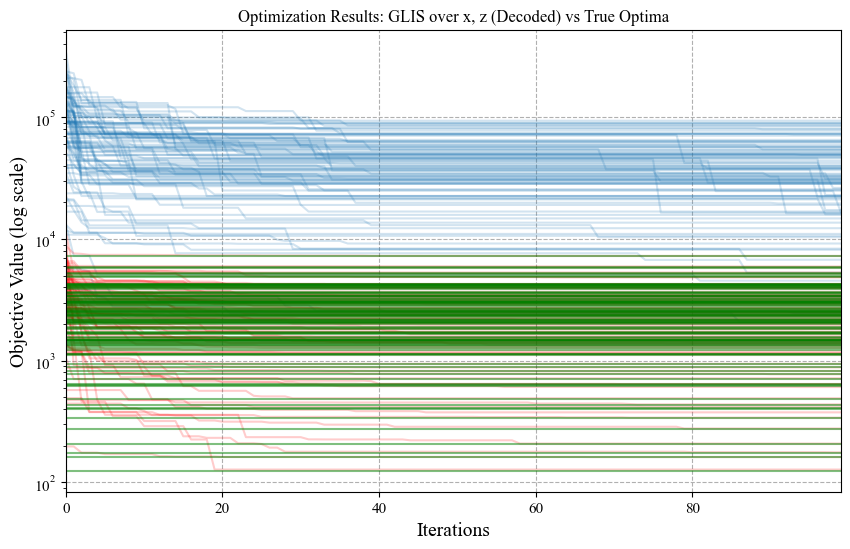

In [8]:
# Plot the best sequences for GLIS over x, z, and the true optima
plt.figure(figsize=(10, 6))

# Plot best GLIS over x
for i in range(n_tests):
    plt.plot(np.arange(max_evals), np.array(best_glis_x_values[i]), label="", color='tab:blue', alpha=0.2)

# Plot best GLIS over z (decoded)
for i in range(n_tests):
    plt.plot(np.arange(max_evals), np.array(best_glis_z_values[i]), label="", color='red', alpha=0.2)
    
# Plot best GLIS over z (decoded)
# for i in range(n_tests):
#     plt.plot(np.arange(max_evals), np.array(best_glis_z_values_naive[i]), label="", color='purple', alpha=0.2)

# Plot true optima (constant across iterations)
for i in range(n_tests):
    plt.plot(np.arange(max_evals), np.repeat(true_optima[i], max_evals), label="", color='green', linestyle='-', alpha=0.5)

# Set plot labels and title
plt.yscale('log')  # Apply log scale for y-axis
plt.xlabel("Iterations")
plt.ylabel("Objective Value (log scale)")
plt.title("Optimization Results: GLIS over x, z (Decoded) vs True Optima")
# plt.legend()
plt.show()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


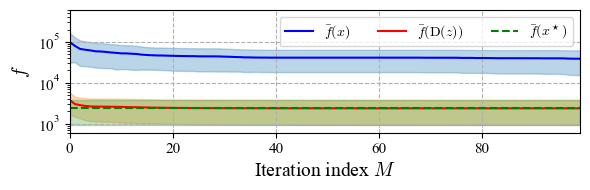

In [26]:
# Compute mean and std deviation for GLIS over x and z
mean_glis_x = np.mean(best_glis_x_values, axis=0)
std_glis_x = np.std(best_glis_x_values, axis=0)

mean_glis_z = np.mean(best_glis_z_values, axis=0)
std_glis_z = np.std(best_glis_z_values, axis=0)

mean_glis_z_naive = np.mean(best_glis_z_values_naive, axis=0)
std_glis_z_naive = np.std(best_glis_z_values_naive, axis=0)

# Compute mean and std deviation of true optima
mean_true_optima = np.mean(true_optima, axis=0)
std_true_optima = np.std(true_optima, axis=0)

# Create the plot
plt.figure(figsize=(6, 2))

# Plot GLIS mean and std dev over x
plt.plot(np.arange(max_evals), mean_glis_x, label=r"$\bar{f}(x)$", color='blue')
plt.fill_between(np.arange(max_evals), mean_glis_x - std_glis_x, mean_glis_x + std_glis_x, color='tab:blue', alpha=0.3, label="")

# Plot GLIS mean and std dev over z (decoded)
plt.plot(np.arange(max_evals), mean_glis_z, label=r"$\bar{f}({\mathrm{D}(z)})$", color='red')
plt.fill_between(np.arange(max_evals), mean_glis_z - std_glis_z, mean_glis_z + std_glis_z, color='tab:orange', alpha=0.3, label="")

# Plot GLIS mean and std dev over z (decoded)
# plt.plot(np.arange(max_evals), mean_glis_z_naive, label=r"$\bar{f}({\mathrm{D}^{\text{naive}}(z)})$", color='magenta')
# plt.fill_between(np.arange(max_evals), mean_glis_z_naive - std_glis_z_naive, mean_glis_z_naive + std_glis_z_naive, color='tab:pink', alpha=0.3, label="")

# Plot true optima mean and std dev
plt.hlines(mean_true_optima, 0, max_evals - 1, label=r"$\bar{f}({x^\star})$", color='green', linestyle='--')
plt.fill_between(np.arange(max_evals), mean_true_optima - std_true_optima, mean_true_optima + std_true_optima, color='tab:green', alpha=0.3, label="")
# Set plot labels and title
plt.ylim([6e2, 6e5])
plt.yscale('log')  # Apply log scale for y-axis
plt.xlabel("Iteration index $M$")
plt.ylabel("$f$")

# Optionally add the legend
plt.legend(loc='upper right', ncol=4, fontsize=10)
plt.tight_layout()
# Show the plot
plt.savefig('rosenbrock_iterations.pdf', dpi=300)
plt.show()

In [26]:
0.00035587003675557796 - 1.6721628480038402e-05

0.00033914840827553957